# W7 Microblog
## Exploring PCA

最近在讀這學期修的言談分析(Discourse Analysis)paper時，看到有一篇在寫怎麼用Factor Analysis(因素分析)來判別網路文本(比如說twitter, FB, online messages......etc)之間共通淺在的語言特徵。我覺得很有趣，於是上網查了一下發現主成分分析(Principal Component Analysis, PCA)跟因素分析(Factor Analysis)是同一個家族的概念。這週的microblog就是想整理一下我的讀書筆記，並利用現成的機器學習資料集實作一下PCA。

### 讀書筆記 

主成分分析(PCA)在機器學習內被歸類成為降維(Dimension reduction)內特徵擷取(Feature extraction)的一種方法，簡單來說，降維就是**當資料維度數(變數)很多的時候，有沒有辦法讓維度數(變數)少一點，但資料特性不會差太多**。如果透過少數變數或成分便能有效代表多個變項之間的結構，那會是相當有效率的方式。PCA的目的即是把少數的變數賦予線性關係，使經由線性組合而得的**成分的變異數最大(在這些成分方面顯示最大的差異)。**

因素分析(Factor Analysis)跟主成分分析(PCA)最大的不同即是在這：**因素分析的目的是在找出共同因素，強調共同點。**

下面是一些小疑問：

* PCA及Factor Analysis裡對於變數的性質有沒有特定限制？(比如說一定要是numerical variables?)
* “資料維度數(變數)很多”是指多少以上？有沒有最低限制？

當然上面講的這些都只是兩者的基本概念，背後還有許多數學模型(線性代數概念)及成分(或因素)的萃取方式、負荷量(loading)、模型評估、轉軸不轉軸等等，這些在論文裡都有出現，但無奈我才疏學淺，還需要一點時間摸索(或可以有高人提點～～)，不過看來本週的大腦“負荷量”已超載，希望之後能有時間慢慢研究。

### PCA小實作 

1.載入scikit learn內建的乳癌資料集及所需套件

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

#這個資料集是以dictionary存在
cancer.keys()

#取得乳癌資料集的描述資料，記得要用print印出，不然只輸入'cancer['DESCR']'，閱讀時可能會看到'\n'等分行符號
print(cancer['DESCR'])

#將資料集轉成data frame
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head()

#資料集中的target則是是否得到惡性腫瘤或良性腫瘤的結果
cancer['target']

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

2.預處理：先將資料轉成一樣的比例尺

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

3.載入PCA套件

In [7]:
from sklearn.decomposition import PCA

#輸入有多少成份我們想要留住分解
pca = PCA(n_components=2)

#將資料轉成兩個主成份
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

#原本有30種維度
scaled_data.shape

#轉型後變成只有兩種維度
x_pca.shape

(569, 2)

4.製作畫出剛剛兩個篩選出的主成份

Text(0, 0.5, 'Second Principle Component')

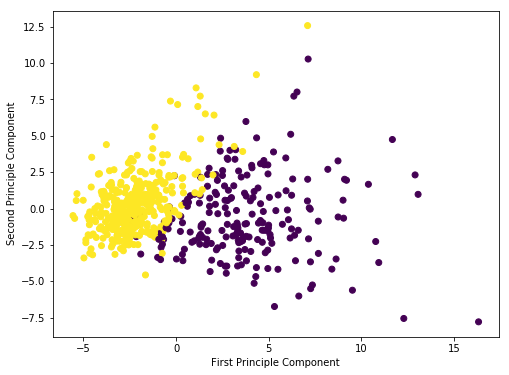

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'])
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')

In [9]:
#最後取得的成份會和原始變數相關，但轉變後的成份也會儲存在調整過的PCA變數中
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

上面的numpy矩陣陣列中，每橫排代表一個主成份，而每行則代表和原始變數的相關度

In [10]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

5.利用heatmap把相關性給畫出

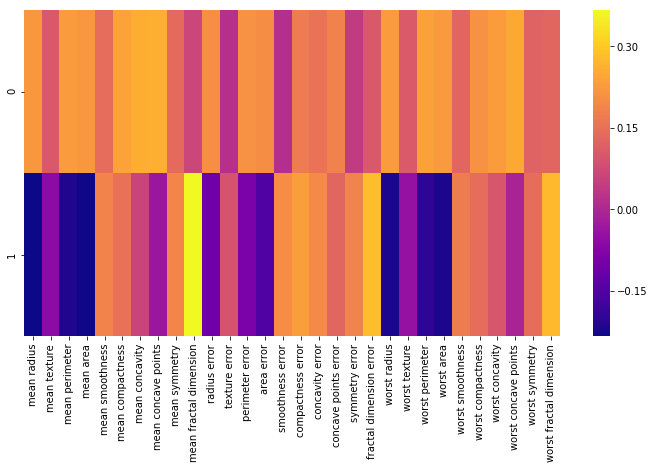

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma')

Reference

[Python學習筆記#18：機器學習之Principle Component Analysis實作篇](http://psop-blog.logdown.com/posts/3161978-python-machine-learning-principle-component-analysis)

[機器/統計學習:主成分分析(Principal Component Analysis, PCA)](https://medium.com/@chih.sheng.huang821/%E6%A9%9F%E5%99%A8-%E7%B5%B1%E8%A8%88%E5%AD%B8%E7%BF%92-%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90-principle-component-analysis-pca-58229cd26e71) -->這個我覺得把PCA概念講得很淺顯易懂，推！

[主成份分析&因素分析](https://zh.scribd.com/presentation/23108284/%E4%B8%BB%E6%88%90%E4%BB%BD%E5%88%86%E6%9E%90-%E5%9B%A0%E7%B4%A0%E5%88%86%E6%9E%90)